## **Ejercicio 1 - Implementación de Newton Raphson para 2 dimensiones**

**ISIS-3302:** Modelado, Simulación y Optimización

Departamento de Ingeniería de Sistemas y Computación

Universidad de los Andes

### **Integrantes - Grupo 15**

Daniel Felipe Diaz Moreno y Sara Sofía Cárdenas Rodríguez


Importamos las librerias a utilizar

In [1]:
!pip install sympy
from sympy import symbols, Eq, latex, diff

# Para mostrar ecuaciones en formato LaTeX
from IPython.display import display, Math

# Para mostrar gráficas
import matplotlib.pyplot as plt
import numpy as np

# Para obtener números aleatorios para RGB
from random import randint

Esta es la función brindada

In [2]:
def f(x):
    return 3*x**3 -10*x**2 -56*x + 50

x, y = symbols('x y')
display(Math(latex(Eq(y, f(x)))))

<IPython.core.display.Math object>

Creamos la función de Python para graficar la función matemática y sus puntos de interés. 

Cabe notar que su dominio en X será entre -6 y 6

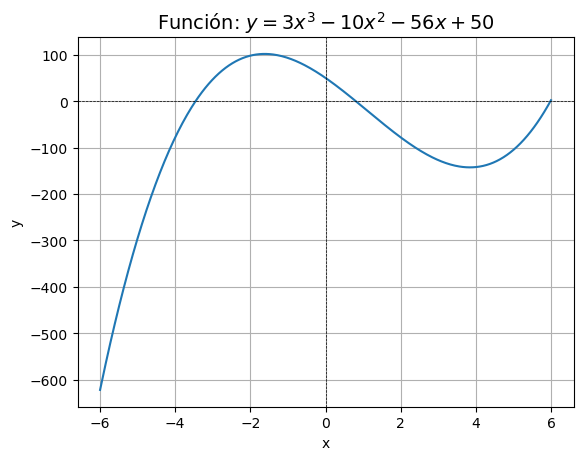

In [16]:
def graficarFuncionYPuntos(funcion, valoresDeX = []):
    valoresEnX = np.linspace(-6, 6, 400)
    valoresEnY = np.array([f(x) for x in valoresEnX])

    plt.plot(valoresEnX, valoresEnY)
    plt.title(f'Función: ${latex(Eq(y, f(x)))}$', fontsize=14)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.grid()

    for i, valorDeX in enumerate(valoresDeX):
        if i == len(valoresDeX) - 1:
            color = (1,0,0)
        else:
            color = (randint(0, 255) / 255, randint(0, 255) / 255, randint(0, 255) / 255)
        valorDeY = funcion(valorDeX)
        plt.plot(valorDeX, valorDeY, 'o', color=color, label=f'Punto ({valorDeX:.2f}, {valorDeY:.2f})')

    if valoresDeX:
        plt.legend()
        
    plt.show()

graficarFuncionYPuntos(f)

Definimos las funciones de derivada, segunda derivada y el método de Newton-Raphson

In [4]:
def derivada(f, valorDeX):
    return diff(f).subs(x, valorDeX)

def segundaDerivada(f, valorDeX):
    return diff(diff(f)).subs(x, valorDeX)

def newtonRaphson(f, x_0, a):
    i = 0
    valoresX = [x_0]
    convergencia=0.001
    while abs(derivada(f, valoresX[i])) > convergencia:
        valoresX.append(valoresX[i] - a * (derivada(f, valoresX[i]) / segundaDerivada(f, valoresX[i])))
        i += 1
    x_gorro = valoresX[-1]
    return x_gorro, valoresX

Hallamos los puntos de inflexión de la función en cuestión

Para esta prueba, el punto de arranque $x_0$ se sitúa en 0 y el tamaño del paso $a$ es 1

In [5]:
xEncontrado, valoresX = newtonRaphson(f(x), 0, 1)
puntoInflexion = (xEncontrado, f(xEncontrado))
print(f'El punto de inflexión es: {puntoInflexion}')
print(f'El punto de inflexión es aproximadamente: x = {puntoInflexion[0]:.2f}, y = {puntoInflexion[1]:.2f}')

El punto de inflexión es: (-8196330378437369/5060691794327840, 13183844744583040195385245796465617470941726392773/129607360540923102220477092590536078996066304000)
El punto de inflexión es aproximadamente: x = -1.62, y = 101.72


Graficamos el punto de inflexión de color rojo sobre la gráfica

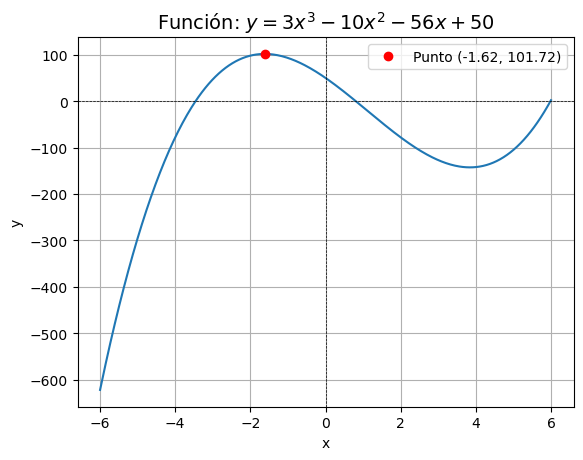

In [6]:
graficarFuncionYPuntos(f, [xEncontrado])

Graficamos los valores de X encontrados por el algoritmo durante sus iteraciones

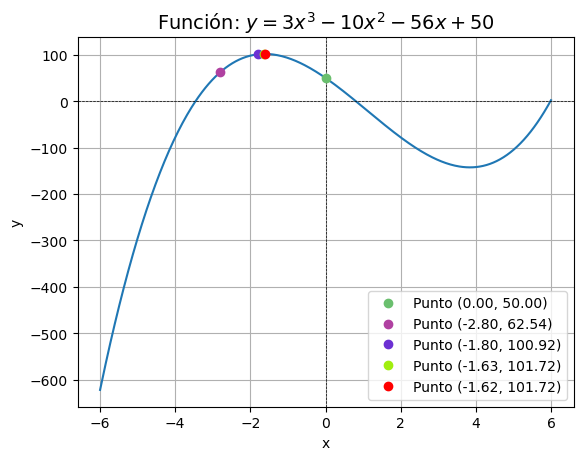

In [8]:
graficarFuncionYPuntos(f, valoresX)

Evidenciamos que hay una variación considerable en X para cada iteración

Ahora, cambiamos el tamaño del paso del algoritmo

Hallamos los puntos de inflexión de la función en cuestión nuevamente

Para esta prueba, $x_0$ se sitúa en 0 y el tamaño del paso $a$ es 0.6, es decir un menor tamaño de paso

In [10]:
xEncontrado, valoresX = newtonRaphson(f(x), 0, 0.6)
puntoInflexion = (xEncontrado, f(xEncontrado))
print(f'El punto de inflexión es: {puntoInflexion}')
print(f'El punto de inflexión es aproximadamente: x = {puntoInflexion[0]:.2f}, y = {puntoInflexion[1]:.2f}')

El punto de inflexión es: (-1.61961754361122, 101.721419900925)
El punto de inflexión es aproximadamente: x = -1.62, y = 101.72


Se obtiene el mismo punto de inflexión

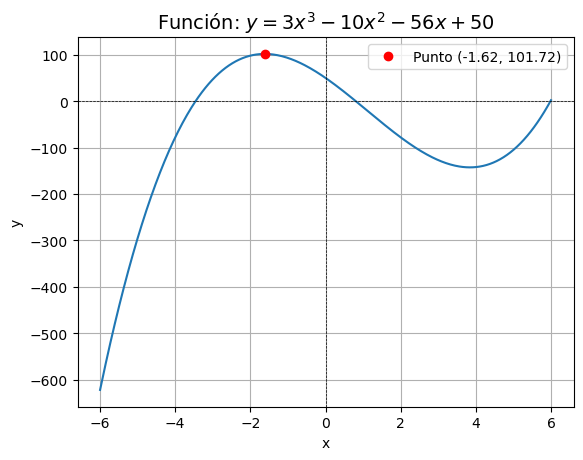

In [11]:
graficarFuncionYPuntos(f, [xEncontrado])

Ahora se obtienen estos valores de X para las iteraciones realizadas

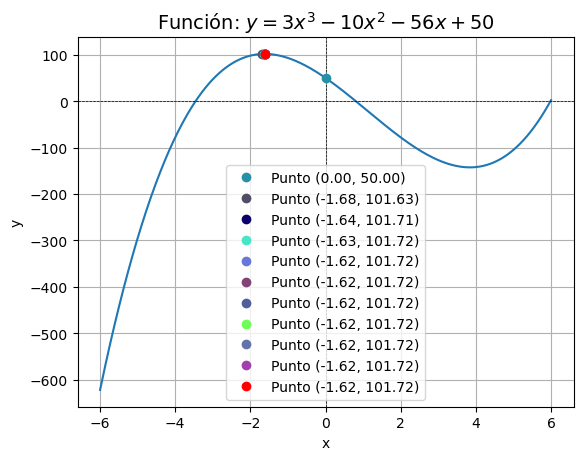

In [15]:
graficarFuncionYPuntos(f, valoresX)

En ambos casos, el algoritmo alcanzó el mismo punto de inflexión. Sin embargo, al utilizar un valor de alpha de 0.6, el algoritmo realizó saltos más cortos, lo que le permitió acercarse rápidamente a un punto cercano al óptimo. No obstante, esto implicó realizar una mayor cantidad de saltos pequeños para llegar a un punto en el que la evaluación de la derivada fuera inferior al umbral de convergencia. 

Es importante destacar que, aunque en el gráfico parece que el algoritmo realizó múltiples iteraciones que llevaron al mismo punto, en realidad se trata de puntos distintos. Esta similitud se debe a que todos los puntos se muestran con solo dos decimales y a la escala utilizada.